In [2]:
from pychem import topology, moreaubroto, estate
from PyBioMed import Pymolecule
from PyBioMed.PyInteraction import PyInteraction
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np
import pandas as pd

In [7]:
def get_headers(filename):
    file = open(str(filename),'r')
    
    variablelist = []

    for line in file:
        temp_line = line.split('=')
        variablelist.append(temp_line[0])
    
    for i in range(0,len(variablelist)):
        variablelist[i] = variablelist[i].strip()
    
    variablelist.remove('mol')
    variablelist.remove('mol.ReadMolFromSmile(smi)')
    variablelist.remove('rdkitmol')
    variablelist.remove('temp')
    variablelist.remove('mol_des')
    variablelist.remove('mol_mol_interaction1')
    variablelist.remove('chg_molecular_descriptor')
    variablelist.remove('conn_molecular_descriptor')
    
    for var in variablelist:
        if 'stuff' in var:
            variablelist.remove(var)
    
    return variablelist

In [4]:
def comp_desc(smi):
    
    ult_list = []
    
    mol=Pymolecule.PyMolecule()
    mol.ReadMolFromSmile(smi)
    rdkitmol=mol.mol
    
    ncarb=Pymolecule.constitution.CalculateCarbonNumber(rdkitmol)
    ult_list.append(ncarb)
    
    IC0=Pymolecule.basak.CalculateBasakIC0(rdkitmol)
    ult_list.append(IC0)
    
    bcutpstuff=Pymolecule.bcut.CalculateBurdenPolarizability(rdkitmol)
    bcutp1=bcutpstuff['bcutp1']
    ult_list.append(bcutp1)
    
    bcutvstuff=Pymolecule.bcut.CalculateBurdenVDW(rdkitmol)
    bcutv10=bcutvstuff['bcutv11']
    ult_list.append(bcutv10)
    
    GMTIV=Pymolecule.topology.CalculateGutmanTopo(rdkitmol)
    ult_list.append(GMTIV)
    
    nsulph=Pymolecule.constitution.CalculateSulfurNumber(rdkitmol)
    ult_list.append(nsulph)
    
    CIC6=Pymolecule.basak.CalculateBasakCIC6(rdkitmol)
    ult_list.append(CIC6)
    
    bcutmstuff=Pymolecule.bcut.CalculateBurdenMass(rdkitmol)
    bcutm12=bcutmstuff['bcutm12']
    ult_list.append(bcutm12)
    
    estatestuff=Pymolecule.estate.GetEstate(rdkitmol)
    S34=estatestuff['S34']
    ult_list.append(S34)
    
    bcutp8=bcutpstuff['bcutp8']
    ult_list.append(bcutp8)
    
    mol_des = Pymolecule.moe.GetMOE(rdkitmol)
    mol_mol_interaction1 = PyInteraction.CalculateInteraction1(mol_des,mol_des) 
    #ult_list.append(mol_mol_interaction1)
    
    slogPVSA2=mol_mol_interaction1['slogPVSA2']
    ult_list.append(slogPVSA2)
    
    chg_molecular_descriptor = mol.GetCharge()
    QNmin=chg_molecular_descriptor['QNmin']
    ult_list.append(QNmin)
    
    LogP2=Pymolecule.molproperty.CalculateMolLogP2(rdkitmol)
    ult_list.append(LogP2)
    
    bcutm1=bcutmstuff['bcutm1']
    ult_list.append(bcutm1)
    
    Estatestuff=Pymolecule.moe.CalculateEstateVSA(rdkitmol)
    EstateVSA9=Estatestuff['EstateVSA9']
    ult_list.append(EstateVSA9)
    
    slogPVSA1=mol_mol_interaction1['slogPVSA1']
    ult_list.append(slogPVSA1)
    
    Hatov=Pymolecule.topology.CalculateHarmonicTopoIndex(rdkitmol)
    ult_list.append(Hatov)
    
    J=Pymolecule.topology.CalculateBalaban(rdkitmol)
    ult_list.append(J)
    
    AW=Pymolecule.topology.CalculateMeanWeiner(rdkitmol)
    ult_list.append(AW)
    
    S7=estatestuff['S7']
    ult_list.append(S7)
    
    conn_molecular_descriptor = Pymolecule.connectivity.GetConnectivity(rdkitmol)
    dchi0=conn_molecular_descriptor['dchi0']
    ult_list.append(dchi0)
    
    SMRVSAstuff=Pymolecule.moe.CalculateSMRVSA(rdkitmol)
    MRVSA1=SMRVSAstuff['MRVSA1']
    ult_list.append(MRVSA1)
    
    LogP=Pymolecule.molproperty.CalculateMolLogP(rdkitmol)
    ult_list.append(LogP)
    
    Tpc=chg_molecular_descriptor['Tpc']
    ult_list.append(Tpc)
    
    PEOEVSAstuff=Pymolecule.moe.CalculatePEOEVSA(rdkitmol)
    PEOEVSA0=PEOEVSAstuff['PEOEVSA0']
    ult_list.append(PEOEVSA0)
    
    Tnc=chg_molecular_descriptor['Tnc']
    ult_list.append(Tnc)
    
    S13=estatestuff['S13']
    ult_list.append(S13)
    
    TPSAstuff=Pymolecule.moe.CalculateTPSA(rdkitmol)
    TPSA=TPSAstuff['MTPSA']
    ult_list.append(TPSA)
    
    QHss=chg_molecular_descriptor['QHss']
    ult_list.append(QHss)
    
    ndonr=Pymolecule.constitution.CalculateHdonorNumber(rdkitmol)
    ult_list.append(ndonr)
    
    MATSestuff=Pymolecule.moran.CalculateMoranAutoElectronegativity(rdkitmol)
    MATSe5=MATSestuff['MATSe5']
    ult_list.append(MATSe5)
    
    PEOEVSA9=PEOEVSAstuff['PEOEVSA9']
    ult_list.append(PEOEVSA9)
    
    EstateVSA7=Estatestuff['EstateVSA7']
    ult_list.append(EstateVSA7)
    
    EstateVSA0=Estatestuff['EstateVSA0']
    ult_list.append(EstateVSA0)
    
    Chiv4=conn_molecular_descriptor['Chiv4']
    ult_list.append(Chiv4)
    
    S28=estatestuff['S28']
    ult_list.append(S28)
    
    QOmax=chg_molecular_descriptor['QOmax']
    ult_list.append(QOmax)
    
    bcutp2=bcutpstuff['bcutp2']
    ult_list.append(bcutp2)
    
    EstateVSA4=Estatestuff['EstateVSA4']
    ult_list.append(EstateVSA4)
    
    MATSe1=MATSestuff['MATSe1']
    ult_list.append(MATSe1)
    
    PC6=Pymolecule.constitution.CalculatePath6(rdkitmol)
    ult_list.append(PC6)
    
    S24=estatestuff['S24']
    ult_list.append(S24)
    
    CIC0=Pymolecule.basak.CalculateBasakCIC0(rdkitmol)
    ult_list.append(CIC0)
    
    QCmax=chg_molecular_descriptor['QCmax']
    ult_list.append(QCmax)
    
    QCss=chg_molecular_descriptor['QCss']
    ult_list.append(QCss)
    
    Geto=Pymolecule.topology.CalculateGeometricTopoIndex(rdkitmol)
    ult_list.append(Geto)
    
    Getov=topology.CalculateGeometricTopovIndex(rdkitmol)
    ult_list.append(Getov)
    
    bcutm11=bcutmstuff['bcutm11']
    ult_list.append(bcutm11)
    
    CIC2=Pymolecule.basak.CalculateBasakCIC2(rdkitmol)
    ult_list.append(CIC2)
    
    PEOEVSA5=PEOEVSAstuff['PEOEVSA5']
    ult_list.append(PEOEVSA5)
    
    Hy=Pymolecule.molproperty.CalculateHydrophilicityFactor(rdkitmol)
    ult_list.append(Hy)
    
    SPP=chg_molecular_descriptor['SPP']
    ult_list.append(SPP)
    
    S36=estatestuff['S36']
    ult_list.append(S36)
    
    S9=estatestuff['S9']
    ult_list.append(S9)
    
    S16=estatestuff['S16']
    ult_list.append(S16)
    
    MRVSA4=SMRVSAstuff['MRVSA4']
    ult_list.append(MRVSA4)
    
    QOmin=chg_molecular_descriptor['QOmin']
    ult_list.append(QOmin)
    
    GMTIV=Pymolecule.topology.CalculateGutmanTopo(rdkitmol)
    ult_list.append(GMTIV)
    
    UI=Pymolecule.molproperty.CalculateUnsaturationIndex(rdkitmol)
    ult_list.append(UI)
    
    MATSpstuff=Pymolecule.moran.CalculateMoranAutoPolarizability(rdkitmol)
    MATSp1=MATSpstuff['MATSp1']
    ult_list.append(MATSp1)
    
    MATSmstuff=Pymolecule.moran.CalculateMoranAutoMass(rdkitmol)
    MATSm2=MATSmstuff['MATSm2']
    ult_list.append(MATSm2)
    
    S12=estatestuff['S12']
    ult_list.append(S12)
    
    dchi3=conn_molecular_descriptor['dchi3']
    ult_list.append(dchi3)
    
    IDE=topology.CalculateDistanceEqualityMeanInf(rdkitmol)
    ult_list.append(IDE)
    
    PEOEVSA7=PEOEVSAstuff['PEOEVSA7']
    ult_list.append(PEOEVSA7)
    
    bcutm9=bcutmstuff['bcutm9']
    ult_list.append(bcutm9)
    
    SIC1=Pymolecule.basak.CalculateBasakSIC1(rdkitmol)
    ult_list.append(SIC1)
    
    MRVSA6=SMRVSAstuff['MRVSA6']
    ult_list.append(MRVSA6)
    
    IC1=Pymolecule.basak.CalculateBasakIC1(rdkitmol)
    ult_list.append(IC1)
    
    QNmax=chg_molecular_descriptor['QNmax']
    ult_list.append(QNmax)
    
    PEOEVSA6=PEOEVSAstuff['PEOEVSA6']
    ult_list.append(PEOEVSA6)
    
    MATSe4=MATSestuff['MATSe4']
    ult_list.append(MATSe4)
    
    VSAEstatestuff=Pymolecule.moe.CalculateVSAEstate(rdkitmol)
    VSAEstate8=VSAEstatestuff['VSAEstate8']
    ult_list.append(VSAEstate8)
    
    EstateVSA3=Estatestuff['EstateVSA3']
    ult_list.append(EstateVSA3)
    
    MRVSA5=SMRVSAstuff['MRVSA5']
    ult_list.append(MRVSA5)
    
    MRVSA9=SMRVSAstuff['MRVSA9']
    ult_list.append(MRVSA9)
    
    S19=estatestuff['S19']
    ult_list.append(S19)
    
    MATSvstuff=Pymolecule.moran.CalculateMoranAutoVolume(rdkitmol)
    MATSv2=MATSvstuff['MATSv2']
    ult_list.append(MATSv2)
    
    S17=estatestuff['S17']
    ult_list.append(S17)
    
    ndb=Pymolecule.constitution.CalculateDoubleBondNumber(rdkitmol)
    ult_list.append(ndb)
    
    AWeight=Pymolecule.constitution.CalculateAverageMolWeight(rdkitmol)
    ult_list.append(AWeight)
    
    S30=estatestuff['S30']
    ult_list.append(S30)
    
    MATSv5=MATSvstuff['MATSv5']
    ult_list.append(MATSv5)
    
    Gravto=topology.CalculateGravitationalTopoIndex(rdkitmol)
    ult_list.append(Gravto)
    
    Chiv3c=conn_molecular_descriptor['Chiv3c']
    ult_list.append(Chiv3c)
    
    knotp=conn_molecular_descriptor['knotp']
    ult_list.append(knotp)
    
    bcutp3=bcutpstuff['bcutp3']
    ult_list.append(bcutp3)
    
    bcutp11=bcutpstuff['bcutp11']
    ult_list.append(bcutp11)
    
    VSAEstate7=VSAEstatestuff['VSAEstate7']
    ult_list.append(VSAEstate7)
    
    MATSp4=MATSpstuff['MATSp4']
    ult_list.append(MATSp4)
    
    bcutm4=bcutmstuff['bcutm4']
    ult_list.append(bcutm4)
    
    nring=Pymolecule.constitution.CalculateRingNumber(rdkitmol)
    ult_list.append(nring)
    
    bcutestuff=Pymolecule.bcut.CalculateBurdenElectronegativity(rdkitmol)
    bcute1=bcutestuff['bcute1']
    ult_list.append(bcute1)
    
    MATSp6=MATSpstuff['MATSp6']
    ult_list.append(MATSp6)
    
    naro=Pymolecule.constitution.CalculateAromaticBondNumber(rdkitmol)
    ult_list.append(naro)
    
    CIC3=Pymolecule.basak.CalculateBasakCIC3(rdkitmol)
    ult_list.append(CIC3)
    
    TIAC=topology.CalculateAtomCompTotalInf(rdkitmol)
    ult_list.append(TIAC)
    
    MATSm1=MATSmstuff['MATSm1']
    ult_list.append(MATSm1)
    
    slogPVSA7=mol_mol_interaction1['slogPVSA7']
    ult_list.append(slogPVSA7)
    
    bcutm8=bcutmstuff['bcutm8']
    ult_list.append(bcutm8)
    
    IDET=topology.CalculateDistanceEqualityTotalInf(rdkitmol)
    ult_list.append(IDET)
    
    Chi10=conn_molecular_descriptor['Chi10']
    ult_list.append(Chi10)
    
    Weight=Pymolecule.constitution.CalculateMolWeight(rdkitmol)
    ult_list.append(Weight)
    
    Rnc=chg_molecular_descriptor['Rnc']
    ult_list.append(Rnc)
    
    naccr=Pymolecule.constitution.CalculateHacceptorNumber(rdkitmol)
    ult_list.append(naccr)
    
    bcutp5=bcutpstuff['bcutp5']
    ult_list.append(bcutp5)
    
    bcutm2=bcutmstuff['bcutm2']
    ult_list.append(bcutm2)
    
    Chiv1=conn_molecular_descriptor['Chiv1']
    ult_list.append(Chiv1)
    
    bcutm3=bcutmstuff['bcutm3']
    ult_list.append(bcutm3)
    
    Chiv9=conn_molecular_descriptor['Chiv9']
    ult_list.append(Chiv9)
    
    S32=estatestuff['S32']
    ult_list.append(S32)
    
    nsb=Pymolecule.constitution.CalculateSingleBondNumber(rdkitmol)
    ult_list.append(nsb)
    
    nhet=Pymolecule.constitution.CalculateHeteroNumber(rdkitmol)
    ult_list.append(nhet)
    
    MATSe3=MATSestuff['MATSe3']
    ult_list.append(MATSe3)
    
    S53=estatestuff['S53']
    ult_list.append(S53)
    
    PEOEVSA12=PEOEVSAstuff['PEOEVSA12']
    ult_list.append(PEOEVSA12)
    
    MATSm3=MATSmstuff['MATSm3']
    ult_list.append(MATSm3)
    
    MATSm4=MATSmstuff['MATSm4']
    ult_list.append(MATSm4)
    
    MATSm6=MATSmstuff['MATSm6']
    ult_list.append(MATSm6)
    
    Chi4c=conn_molecular_descriptor['Chi4c']
    ult_list.append(Chi4c)
    
    Chiv3=conn_molecular_descriptor['Chiv3']
    ult_list.append(Chiv3)
    
    Chiv4=conn_molecular_descriptor['Chiv4']
    ult_list.append(Chiv4)
    
    Chiv4c=conn_molecular_descriptor['Chiv4c']
    ult_list.append(Chiv4c)
    
    Chiv4pc=conn_molecular_descriptor['Chiv4pc']
    ult_list.append(Chiv4pc)
    
    Ds=estate.CalculateDiffMaxMinEState(rdkitmol)
    ult_list.append(Ds)
    
    QNss=chg_molecular_descriptor['QNss']
    ult_list.append(QNss)
    
    Qmax=chg_molecular_descriptor['Qmax']
    ult_list.append(Qmax)
    
    S46=estatestuff['S46']
    ult_list.append(S46)
    
    ATSmstuff=moreaubroto.CalculateMoreauBrotoAutoMass(rdkitmol)
    ATSm1=ATSmstuff['ATSm1']
    ult_list.append(ATSm1)
    
    ATSm2=ATSmstuff['ATSm2']
    ult_list.append(ATSm2)
    
    ATSm3=ATSmstuff['ATSm3']
    ult_list.append(ATSm3)
    
    ATSm4=ATSmstuff['ATSm4']
    ult_list.append(ATSm4)
    
    ATSm6=ATSmstuff['ATSm6']
    ult_list.append(ATSm6)
    
    Smin=estate.CalculateMinEState(rdkitmol)
    ult_list.append(Smin)
    
    Smaxstuff=estate.CalculateMaxAtomTypeEState(rdkitmol)  
    Smax45=Smaxstuff['Smax45']
    ult_list.append(Smax45)
    
    Sminstuff=estate.CalculateMinAtomTypeEState(rdkitmol)
    Smin45=Sminstuff['Smin45']
    ult_list.append(Smin45)
    
    nphos=Pymolecule.constitution.CalculatePhosphorNumber(rdkitmol)
    ult_list.append(nphos)
    
    slogPVSA11=mol_mol_interaction1['slogPVSA11']
    ult_list.append(slogPVSA11)
    
    nnitro=Pymolecule.constitution.CalculateNitrogenNumber(rdkitmol)
    ult_list.append(nnitro)
    
    nhev=Pymolecule.constitution.CalculateHeavyAtomNumber(rdkitmol)
    ult_list.append(nhev)
    
    Arto=Pymolecule.topology.CalculateArithmeticTopoIndex(rdkitmol)
    ult_list.append(Arto)
    
    temp = Chem. GraphDescriptors.BertzCT(rdkitmol)
    BertzCTValue=np.log10(temp)
    ult_list.append(BertzCTValue)
    
    MZM2=Pymolecule.topology.CalculateMZagreb2(rdkitmol)
    ult_list.append(MZM2)
    
    MZM1=Pymolecule.topology.CalculateMZagreb1(rdkitmol)
    ult_list.append(MZM1)
    
    kappastuff=mol.GetKappa()
    phi=kappastuff['phi']
    ult_list.append(phi)
    
    kappa3=kappastuff['kappa3']
    ult_list.append(kappa3)
    
    kappa2=kappastuff['kappa2']
    ult_list.append(kappa2)
    
    kappam3=kappastuff['kappam3']
    ult_list.append(kappam3)
    
    MATSv3=MATSvstuff['MATSv3']
    ult_list.append(MATSv3)
    
    MATSv7=MATSvstuff['MATSv7']
    ult_list.append(MATSv7)
    
    MATSv6=MATSvstuff['MATSv6']
    ult_list.append(MATSv6)
    
    MATSm5=MATSmstuff['MATSm5']
    ult_list.append(MATSm5)
    
    MATSe6=MATSestuff['MATSe6']
    ult_list.append(MATSe6)
    
    MATSe2=MATSestuff['MATSe2']
    ult_list.append(MATSe2)
    
    MATSp3=MATSpstuff['MATSp3']
    ult_list.append(MATSp3)
    
    MATSp2=MATSpstuff['MATSp2']
    ult_list.append(MATSp2)
    
    QOss=chg_molecular_descriptor['QOss']
    ult_list.append(QOss)
    
    LDI=chg_molecular_descriptor['LDI']
    ult_list.append(LDI)
    
    Qass=chg_molecular_descriptor['Qass']
    ult_list.append(Qass)
    
    QHmax=chg_molecular_descriptor['QHmax']
    ult_list.append(QHmax)
    
    Rpc=chg_molecular_descriptor['Rpc']
    ult_list.append(Rpc)
    
    Qmin=chg_molecular_descriptor['Qmin']
    ult_list.append(Qmin)
    
    Mnc=chg_molecular_descriptor['Mnc']
    ult_list.append(Mnc)
    
    EstateVSA5=Estatestuff['EstateVSA5']
    ult_list.append(EstateVSA5)
    
    EstateVSA6=Estatestuff['EstateVSA6']
    ult_list.append(EstateVSA6)
    
    EstateVSA1=Estatestuff['EstateVSA1']
    ult_list.append(EstateVSA1)
    
    EstateVSA2=Estatestuff['EstateVSA2']
    ult_list.append(EstateVSA2)
    
    PEOEVSA11=PEOEVSAstuff['PEOEVSA11']
    ult_list.append(PEOEVSA11)
    
    PEOEVSA2=PEOEVSAstuff['PEOEVSA2']
    ult_list.append(PEOEVSA2)
    
    PEOEVSA1=PEOEVSAstuff['PEOEVSA1']
    ult_list.append(PEOEVSA1)
    
    PEOEVSA8=PEOEVSAstuff['PEOEVSA8']
    ult_list.append(PEOEVSA8)
    
    MRVSA3=SMRVSAstuff['MRVSA3']
    ult_list.append(MRVSA3)
    
    MRVSA2=SMRVSAstuff['MRVSA2']
    ult_list.append(MRVSA2)
    
    slogPVSA4=mol_mol_interaction1['slogPVSA4']
    ult_list.append(slogPVSA4)
    
    slogPVSA5=mol_mol_interaction1['slogPVSA5']
    ult_list.append(slogPVSA5)
    
    nta=Pymolecule.constitution.CalculateAllAtomNumber(rdkitmol)
    ult_list.append(nta)
    
    MATSv1=MATSvstuff['MATSv1']
    ult_list.append(MATSv1)
    
    
    return ult_list

In [8]:
def build_matrix(smi_list, headers):
    
    df_full = pd.DataFrame()
    
    for smi in smi_list:
        desc_list = comp_desc(smi)
        row = pd.Series(desc_list)
        row_df = pd.DataFrame([row], index=[smi
                                           ])
        df_full = pd.concat([df_full, row_df])
    
    df_full.columns = headers
    
    return df_full  

In [9]:
var_list = get_headers('desc.txt')

In [10]:
smi_df = pd.read_csv('qnar_supp_data.csv')
smiles = smi_df['Unnamed: 1'].values.tolist()

In [11]:
df = build_matrix(smiles, var_list)

In [12]:
PaCa2 = pd.read_csv('PaCa2.csv')
PaCa2 = PaCa2['PaCa2 cellular'].values.tolist()

In [13]:
df.head()

,ncarb,IC0,bcutp1,bcutv10,GMTIV,nsulph,CIC6,bcutm12,S34,bcutp8,...,PEOEVSA11,PEOEVSA2,PEOEVSA1,PEOEVSA8,MRVSA3,MRVSA2,slogPVSA4,slogPVSA5,nta,MATSv1
FC(F)(F)C(=O)OC(=O)C(F)(F)F,4.0,1.526235,3.255,0.774,2.850033,0.0,2.174205,0.000,0.0,0.317,...,0.0,9.589,0.000,0.000,0.000,0.0,0.000,0.000,13.0,-0.415
FC(F)(Cl)C(=O)OC(=O)C(F)(F)Cl,4.0,1.950064,3.300,0.713,2.850033,0.0,1.750376,0.000,0.0,0.317,...,0.0,9.589,0.000,0.000,0.000,0.0,0.000,0.000,13.0,-0.254
FC(F)(F)C(F)(F)C(=O)OC(=O)C(F)(F)C(F)(F)F,6.0,1.432983,3.383,1.145,3.315970,0.0,1.658409,0.358,0.0,0.317,...,0.0,9.589,0.000,0.000,0.000,0.0,0.000,0.000,19.0,-0.267
CC1(C)CC(=O)OC1=O,6.0,1.483659,3.650,1.117,2.408240,0.0,1.147634,0.883,0.0,0.380,...,0.0,0.000,9.589,11.836,5.415,0.0,20.268,0.000,17.0,-0.167
O=C1OC(=O)C=C1,4.0,1.530493,3.542,0.421,2.152288,0.0,0.888889,0.143,0.0,0.000,...,0.0,9.589,0.000,0.000,0.000,0.0,0.000,12.152,9.0,-0.250


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()
x = std.fit_transform(df)
x

array([[-0.92840377,  0.22029409, -1.88330377, ..., -0.68474256,
        -0.75015607, -2.30379417],
       [-0.92840377,  2.0142101 , -1.68583044, ..., -0.68474256,
        -0.75015607, -1.07096854],
       [-0.46632153, -0.1744074 , -1.32160185, ..., -0.68474256,
        -0.2648919 , -1.17051346],
       ...,
       [-0.46632153,  0.44728432, -0.3210703 , ..., -0.68474256,
        -0.42664663, -0.40478325],
       [-0.00423929,  1.05410994,  0.78039206, ...,  0.21342473,
        -0.58840135,  0.39923347],
       [ 1.38200744,  1.21036459, -0.47904897, ..., -0.68474256,
         1.7570421 , -2.08173241]])

Text(0,0.5,'cumulative explained variance')

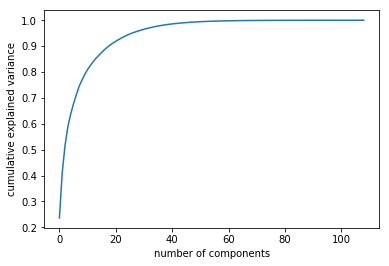

In [19]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0,0.5,'explained variance')

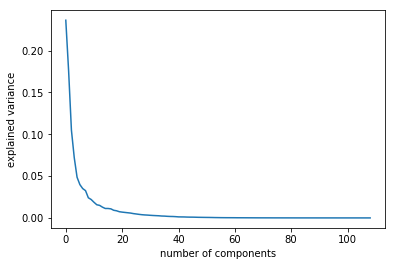

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')

In [21]:
print(str((pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100)+'% of the variance is explained by the first two PCs')

41.194175838156% of the variance is explained by the first two PCs


In [22]:
df['PaCa2 Uptake'] = PaCa2

In [23]:
mat = df.corr()
correlation_df = mat['PaCa2 Uptake']
correlation_df.sort_values(ascending=False)

PaCa2 Uptake    1.000000
QNmin           0.480428
QNmax           0.468595
S36             0.414818
QCss            0.387347
MATSp2          0.355315
EstateVSA9      0.355077
ndb             0.351092
MATSv2          0.343314
Rpc             0.326277
MATSe2          0.312456
MATSm2          0.299710
Qmin            0.283957
LogP            0.273723
PEOEVSA2        0.258833
slogPVSA2       0.255884
PEOEVSA8        0.250137
QCmax           0.243636
Ds              0.242793
Qmax            0.227903
EstateVSA1      0.216140
MRVSA9          0.204574
ATSm2           0.200691
VSAEstate7      0.190713
Chi4c           0.189805
UI              0.184928
S7              0.184663
dchi3           0.176005
Arto            0.175187
EstateVSA7      0.169518
                  ...   
PEOEVSA9       -0.167294
Smin           -0.174554
MATSv7         -0.178096
S16            -0.217372
slogPVSA1      -0.219206
MATSm3         -0.228836
PEOEVSA7       -0.233624
MATSe3         -0.246760
IC1            -0.257407


In [28]:
df.to_csv('features.csv')